In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lorenz_attractor.visualisation as vis
from lorenz_attractor.lorenz import LorenzAttractor
import itertools


# The Lorenz Attractor
## Scientific Computing using Python

### by Søren Heidelbach
### on 2023-07-17


This project aims to implementation a module for the Lorentz Attractor. The module will be used to generate a plot of the attractor and a plot of the time evolution of the attractor. The module will also be used to generate a plot of the attractor for different values of the parameters. Unit testing will be used to ensure proper funcitonallity of the modeul.

---
## Introduction

The Lorenz Attractor is a system of differential equations that describes a chaotic system. The system was first described by Edward Lorenz in 1963. The system is described by the following equations:

$$
\begin{align}
\frac{dx}{dt} &= \sigma(y-x) \\
\frac{dy}{dt} &= x(\rho-z)-y \\
\frac{dz}{dt} &= xy-\beta z
\end{align}
$$

where $\sigma$, $\rho$ and $\beta$ are parameters.


Using eulers method, the system can be solved numerically. The system is solved by discretizing the time and using the following equations:

$$
\begin{align}
x_{n+1} &= x_n + \sigma(y_n-x_n)\Delta t \\
y_{n+1} &= y_n + (x_n(\rho-z_n)-y_n)\Delta t \\
z_{n+1} &= z_n + (x_ny_n-\beta z_n)\Delta t
\end{align}
$$

where $\Delta t$ is the time step.  The system is solved by iterating over the equations for a given number of time steps.



---
## Core algorithm

```
algorithm lorentz-attractor is
    input: Initial values: x0, y0, z0
           Parameters: sigma, rho, beta
           Time step: dt
           Number of time steps: nstep
    output: x, y, z at time t
    n = 0
    while n < nstep do
        x[n+1] = x[n] + sigma * (y[n] - x[n]) * dt
        y[n+1] = y[n] + (x[n] * (rho - z[n]) - y[n]) * dt
        z[n+1] = z[n] + (x[n] * y[n] - beta * z[n]) * dt
        n += 1
end algorithm
```

---
## Structure

The module is structured as follows:

```
lorentz-attractor/
├── __init__.py
├── lorentz.py
├── visualisation.py
test/
├── __init__.py
├── test_lorenz.py/
├── data/
│   ├── test_data
simulations/
├── out_simulations.npz
README.md
README.ipynb
README.pdf
```

It contains the lorentz-attractor module, the test module and the simulations outputs. Additionally, it contains this report, serving as the README file for the project. 

## Design considerations

### Content
The module contains the following funcitonailies:

    1. Solving the lorentz attractor

The solver of the lorenz attractor is implemented as a class, such every parameter setting can be instasiated and have acces to all parameters doing simulation.
The class is also implemented with the possibility to save the simulation data to a file. The class is implemented such that any extension to the simulation method is easily added. 

    2. Visualise the lorentz attractor
  
Two visualisation functions are implemented. The first for simply plotting the simulation of attractor. The second for easily plotting multiple simulation with varying parameters, making it easy to compare the attractor for different parameter settings.



## Test plan

The primary test is in the solver itself. Here i will implement the Lorentz Attractor using SciPy's odeint function. I will then compare the results of the two methods. If the results are similar, the solver is working as intended. additionally, i iwll use the hypothsis package, to test over a range of parameter settings, to ensure the solver is working as intended. The testing range is similair to the ranges used in this report.

No testin has been implemented for figures, but this could be done by comparing the figures to a reference figure, visualy inspected to be valid.

The testing scope is quite limited and could be expanded to test the induvidual step frunction and solver methods, such any breaking changes could more easily be identified.

# Results

## Floating point precision

First the solver is inspected for any floating point errors. There a many ways to do this, but here i simply compare different precision levels to see if the results are the same. A very low time step has been choosen to ensure a breaking point is reached for atleast f16.

A summary of when the simulation fail is given in the table below. 

|     |  f64   |  f32  |   f16|
| -------- | -------- | -------- | -------- |
| 0.001 |  pass  |  pass  |  pass  |
| 0.0001 |  pass  |  pass  |  fail  |
| 0.00005 |  pass  |  pass  |  fail  |

The results are probably different for other parameter settings, but this shows that the solver is working as intended for the parameter settings used in this report using f64.

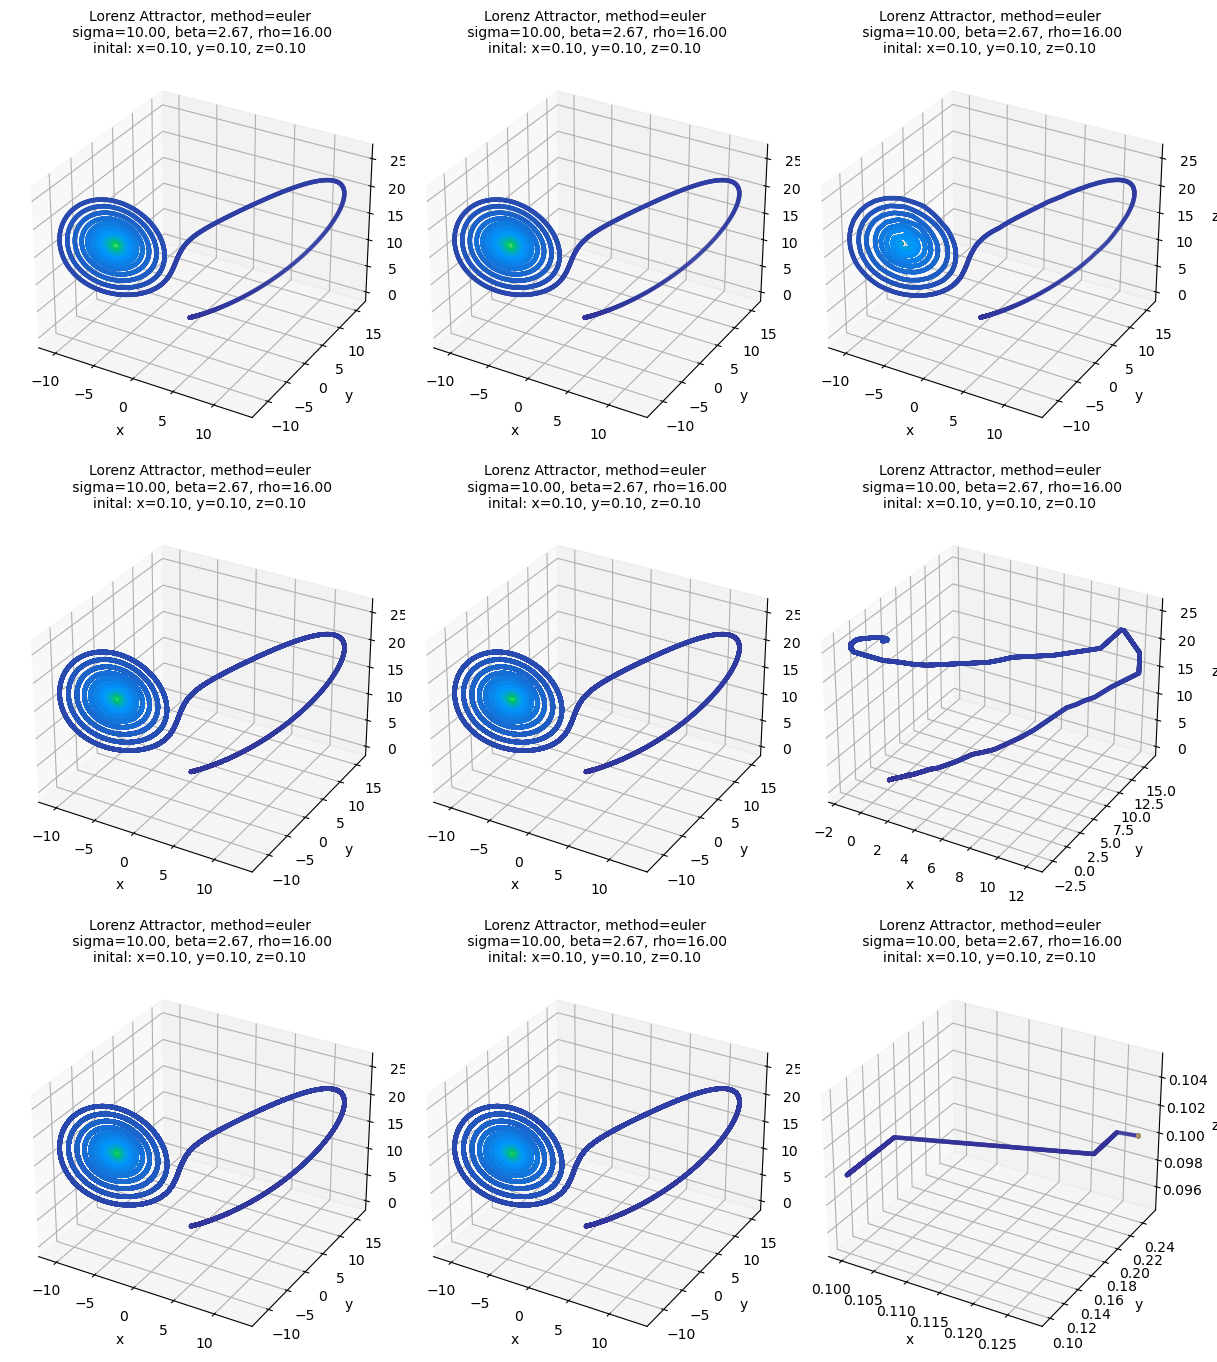

In [2]:
combinations = list(itertools.product([0.001, 0.0001, 0.00005], [np.float64, np.float32, np.float16]))
vis.plot_multiple_settings(
    dtype=[i[1] for i in combinations],
    dt=[i[0] for i in combinations]
)

At a timestep of 0.00005, encoding the values as f16, the results are not the same. This is due to the low precision of f16. At a timestep of 0.0001, the results are the same. This is the lowest precision that can be used for the solver. The results are the same for all higher precisions. This shows that the solver is working as intended.

## Parameter settings

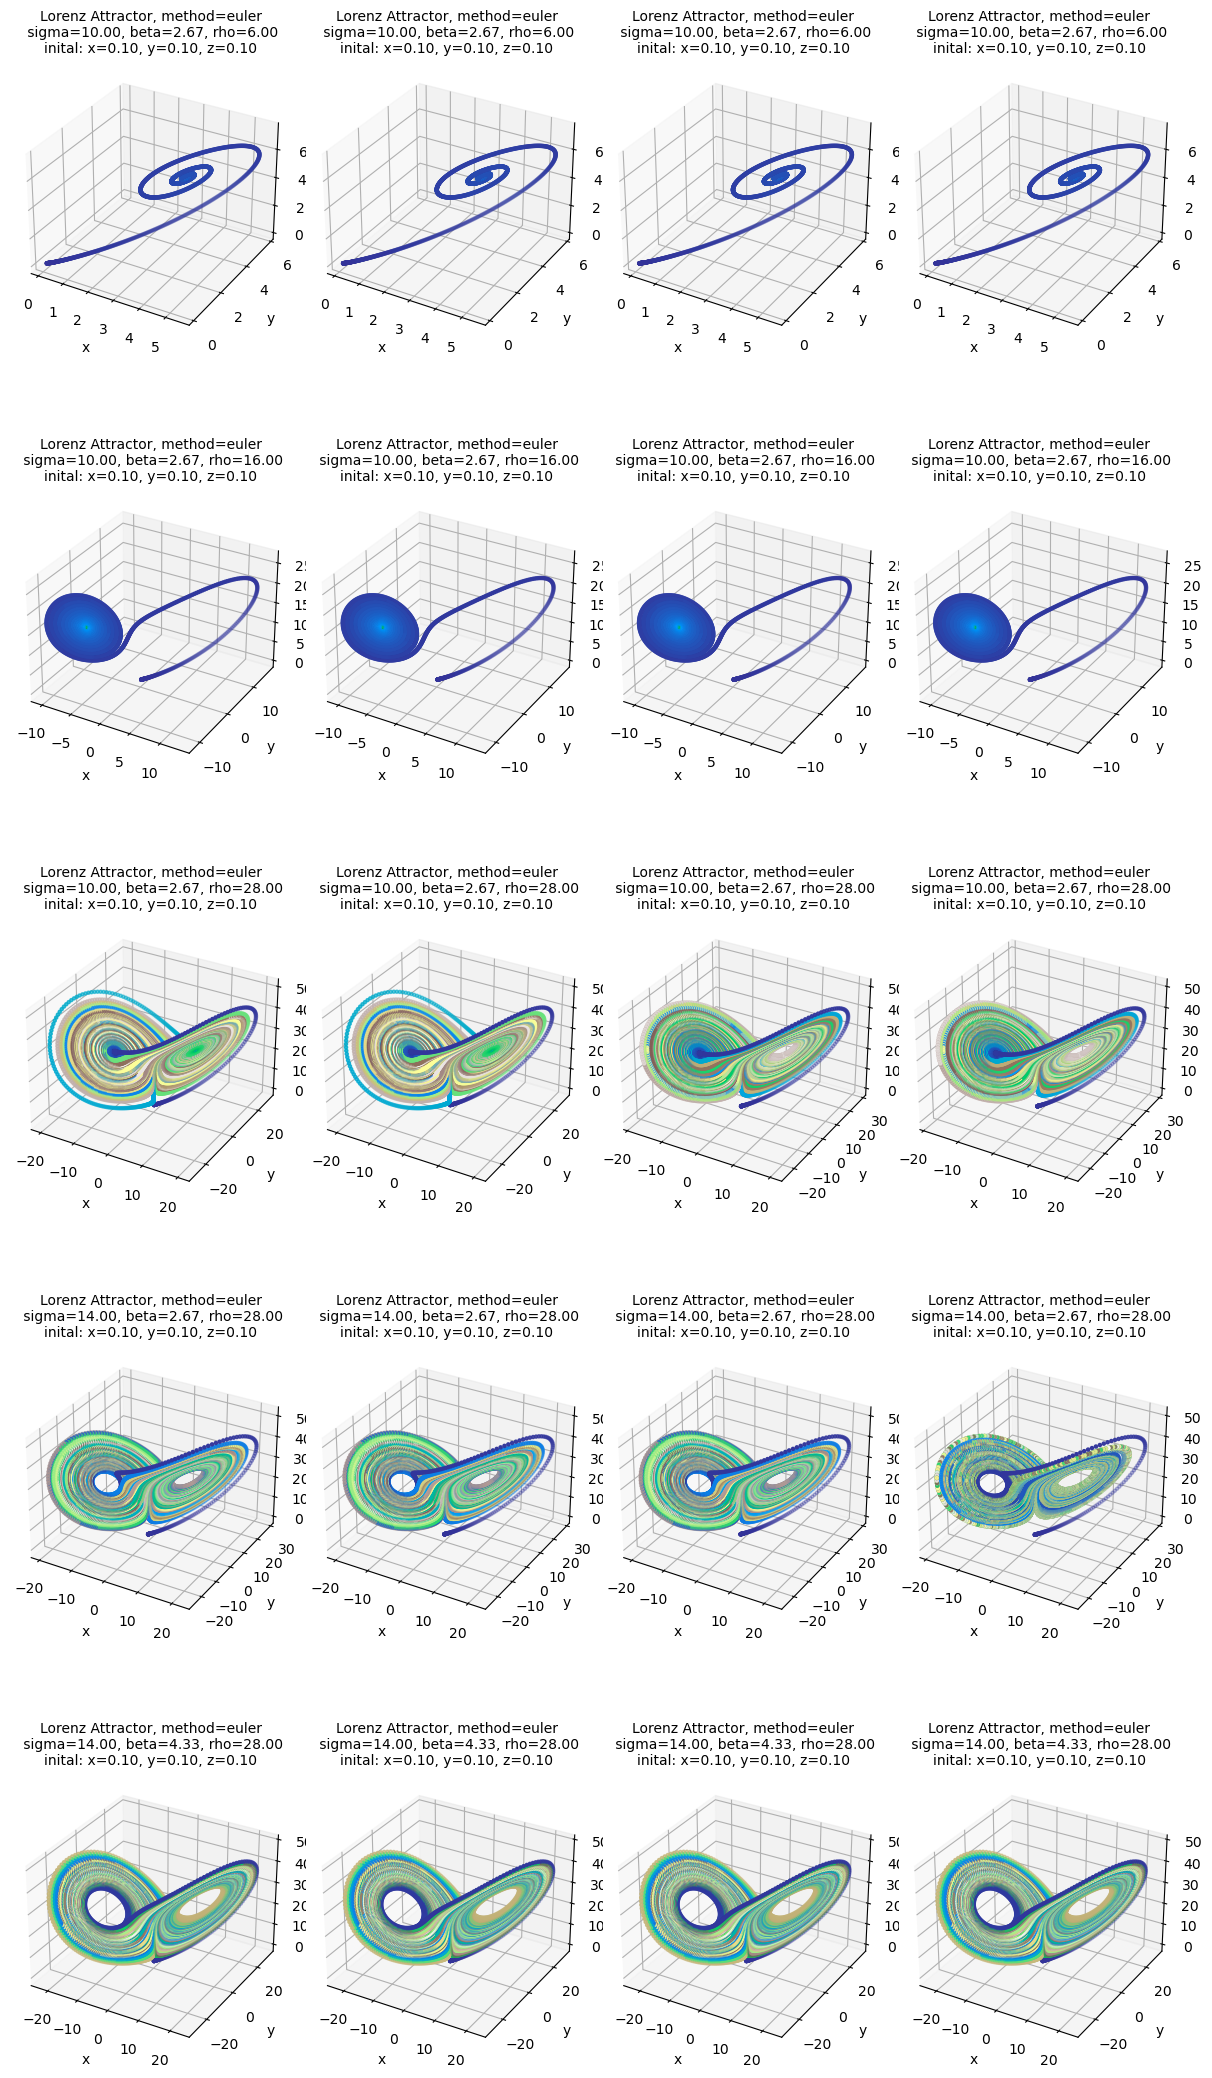

In [14]:

vis.plot_multiple_settings(
    sigma = [i for i in [10, 10, 10, 14, 14] for _ in range(4)],
    beta =  [i for i in [8/3, 8/3, 8/3, 8/3, 13/3] for _ in range(4)],
    rho =   [i for i in [6, 16, 28, 28,28] for _ in range(4)],
    dtype = [i for i in [float, np.float64, np.float32, np.float16] for _ in range(5)], 
    ncols = 4,
    total_time=[100],
    dt = [0.003]
)